In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import plotly.express as px
from wordcloud import WordCloud

In [3]:
df=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\Machine Learning\nlp\iphone.csv')

In [4]:
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


In [6]:
df.isnull().sum()

productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64

In [7]:
df[['reviewDescription','reviewUrl']]=df[['reviewDescription','reviewUrl']].fillna('Unknown',inplace=False)

In [9]:
df.isna().sum()

productAsin          0
country              0
date                 0
isVerified           0
ratingScore          0
reviewTitle          0
reviewDescription    0
reviewUrl            0
reviewedIn           0
variant              0
variantAsin          0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3062   │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 11     │ │ bool        │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd       ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ratingScore       │    0 │       0 │    3.759 │    1.579 │    1 │     3 │     5 │     5 │      5 │ ▃▁ ▁▂▇  │  │
│ └───────────────────┴──────┴─────────┴──────────┴──────────┴──────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ isVerified                         │            2850 │                          0.93 │       ▁    ▇        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA     ┃ NA %      ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ productAsin                       │      0 │         0 │                         1 │                  3062 │  │
│ │ country                           │      0 │         0 │                       1.2 │                  3801 │  │
│ │ date                              │      0 │         0 │                         1 │                  3062 │  │
│ │ reviewTitle                       │      0 │         0 │                       3.8 │                 11638 │  │
│ │ reviewDescription                 │      0 │         0 │                        36 │                108775 │  │
│ │ reviewUrl                         │      0 │         0 │                         1 │                  3062 │  │
│ │ reviewedIn                        │      0 │         0 │                       7.5 │                 22832 │  │
│ │ variant                           │      0 │         0 │                       4.3 │                 13022 │  │
│ │ variantAsin                       │      0 │         0 │                         1 │                  3062 │  │
│ └───────────────────────────────────┴────────┴────────

Data Cleaning

 Identifying Outliers Using Z-Score

In [13]:
from scipy import stats

z_scores=stats.zscore(df.select_dtypes('Float64','int64'))

df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(df_outliers)

Empty DataFrame
Columns: [productAsin, country, date, isVerified, ratingScore, reviewTitle, reviewDescription, reviewUrl, reviewedIn, variant, variantAsin]
Index: []


In [14]:
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

EDA

In [16]:
fig=px.histogram(df,x='ratingScore',nbins=5,title='Rating Score Distribution')

fig.show()

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11680\2613684399.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




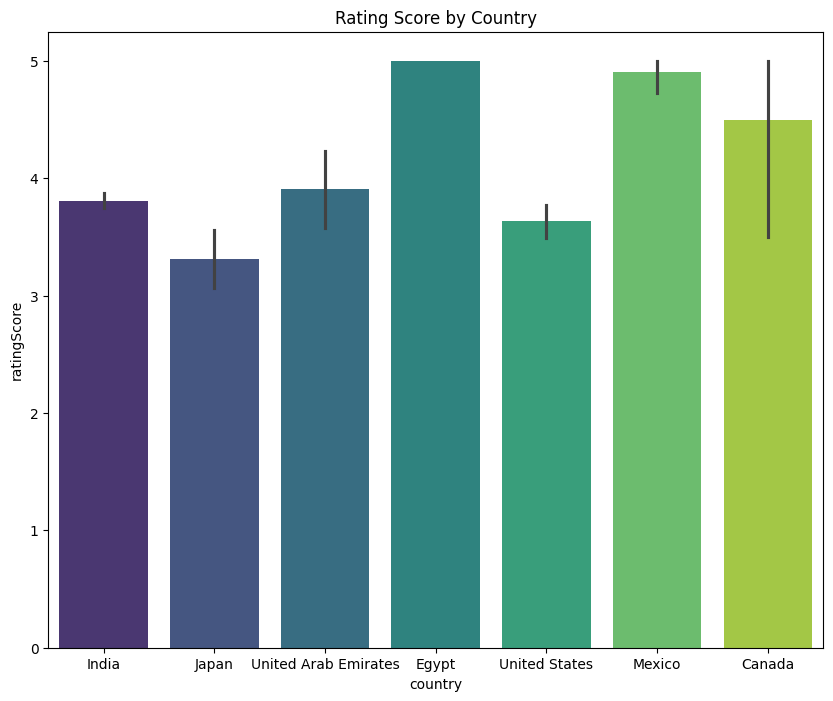

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(x='country',y='ratingScore',data=df,palette='viridis')
plt.title('Rating Score by Country')
plt.show()

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11680\3390688534.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




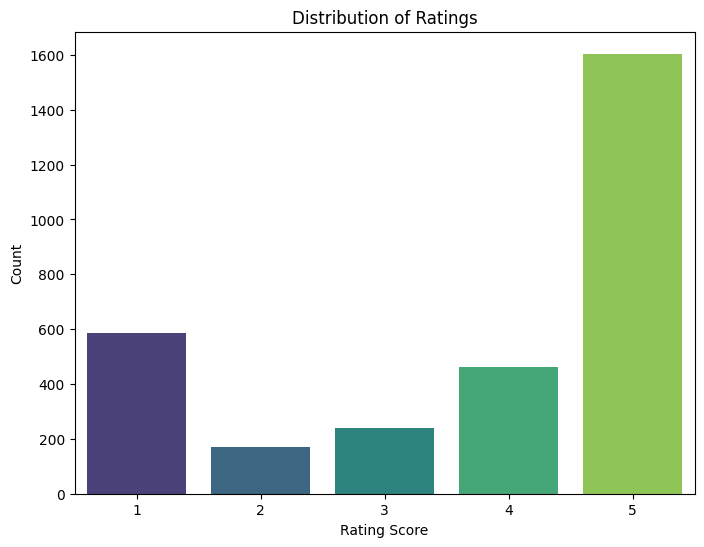

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ratingScore', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()

In [26]:
verified_ratings=df.groupby('isVerified')['ratingScore'].value_counts().unstack().fillna(0)

fig=px.bar(verified_ratings,barmode='group',title='Rating Score Distribution for Verified and Unverified Reviews',labels={'value': 'Count of Reviews', 'ratingScore': 'Rating Score'})
fig.show()

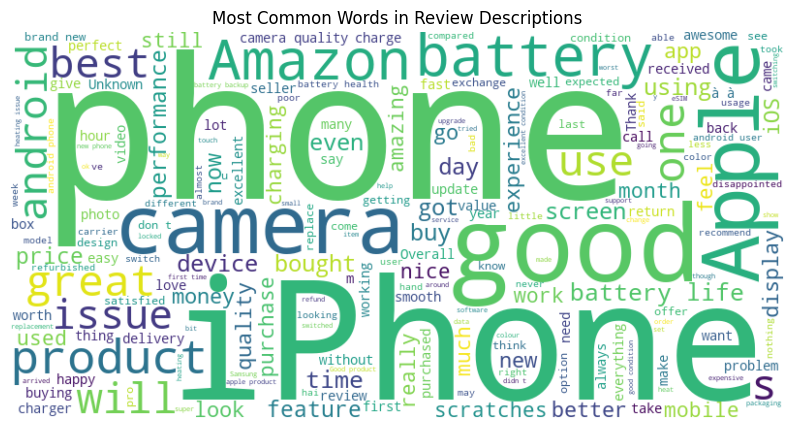

In [29]:
text = " ".join(review for review in df['reviewDescription'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Review Descriptions')
plt.show()

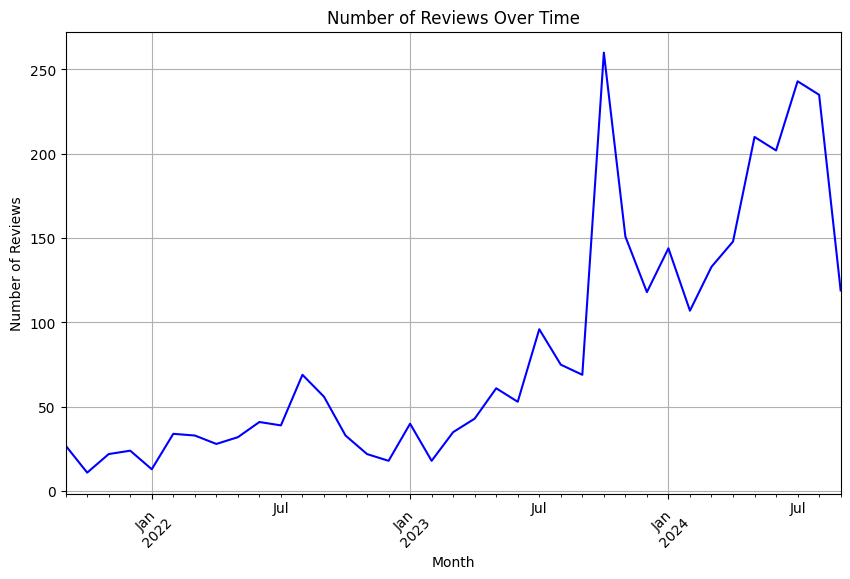

In [31]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
reviews_per_month = df.groupby(df['date'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
reviews_per_month.plot(kind='line', color='blue')
plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11680\3778504116.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




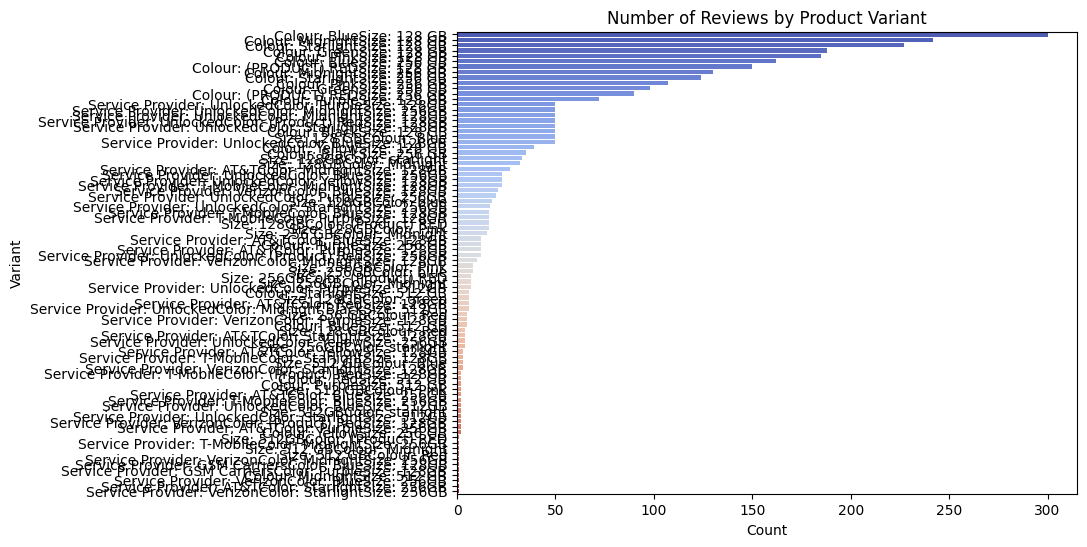

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='variant', palette='coolwarm', order=df['variant'].value_counts().index)
plt.title('Number of Reviews by Product Variant')
plt.ylabel('Variant')
plt.xlabel('Count')
plt.show()

In [30]:
top_review_titles = df['reviewTitle'].value_counts().head(10)
print("\nTop 10 Most Common Review Titles:\n", top_review_titles)


Top 10 Most Common Review Titles:
 reviewTitle
Good            121
Excellent        32
Nice             29
Good product     27
Awesome          20
Great phone      19
Amazing          16
Perfect          15
Nice phone       13
Great            13
Name: count, dtype: int64


C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11680\1646068271.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




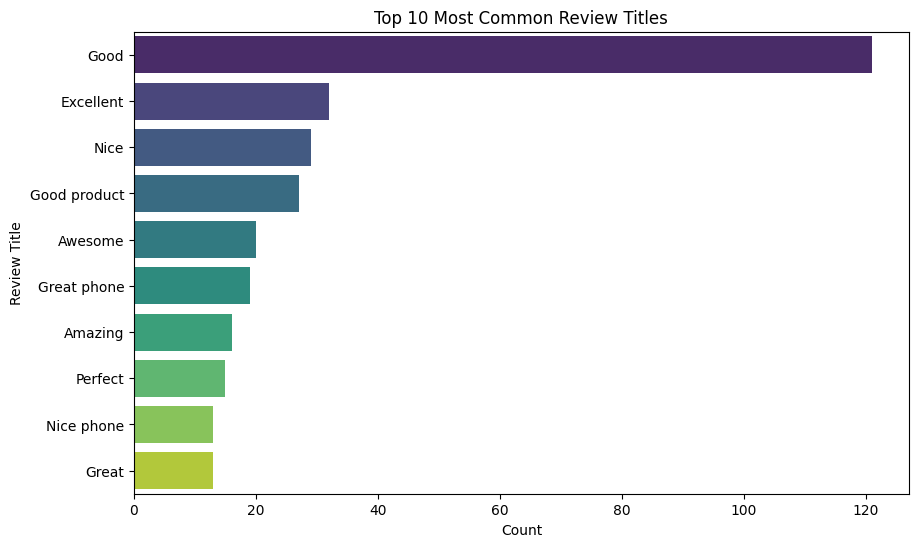

In [34]:
# Get the top 10 most common review titles
top_review_titles = df['reviewTitle'].value_counts().head(10).reset_index()

# Rename columns for clarity
top_review_titles.columns = ['reviewTitle', 'count']

# Plot the top 10 most common review titles using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_review_titles, x='count', y='reviewTitle', palette='viridis')
plt.title('Top 10 Most Common Review Titles')
plt.xlabel('Count')
plt.ylabel('Review Title')
plt.show()
